# Multi - Class Classification on Consumer Complaint Dataset
(Consumer Complaints about various financial products and services)

## Verzeo Major Project - ML07B17
Group Members :
 - Devanshu Garg (gargdevanshu0804cse@gmail.com)
 - Gaurav Verma (gverma0549@gmail.com)
 - Ekagra Shukla (ekagrashukla2@gmail.com)
 - Harsh Mohan Agarwal (harshmohanagarwal28@gmail.com)
 - Abheet Singh (abheetsingh8@gmail.com)
 - Ayushi Singh (ayushijadoun25@gmail.com)
 - Harsh Porwal (harshporwal.hp@gmail.com)

**Data Source** : https://catalog.data.gov/dataset/consumer-complaint-database

___Dataset which we used can be downloaded from the following link:___<br>
https://drive.google.com/file/d/1NW9bR3PgjSljVXTfK3KtFlD1WWhA5wAt/view?usp=sharing<br>
(Size of this dataset is very large, we have reduced it by cleaning and sampling it after performing some computations. The reduced dataset can be downloaded from the link : https://drive.google.com/file/d/1wS5bnp1nM8zr8N2zILQsS8jrHueLcH8u/view?usp=sharing)

**Link to GitHub Repository of this project :** <br>
https://github.com/gargdevanshu/ML07B17

### Objective

Classify Consumer Complaints into Predefined Product Categories.

**Classification Algorithms used:** <br>
 - Linear Support Vector Machine (Linear SVC),<br> 
 - Random Forest Classifier,<br>
 - Multinomial Naive Bayes,<br>
 - Logistic Regression,<br>
 - K Nearest Neighbors Classifier (KNN), and<br>
 - Decision Tree Classifier.<br>

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [2]:
df = pd.read_csv('Verzeo_Major_Project_Main_Dataset.csv')

In [3]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275
1,05/10/2019,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,NaN,NaN,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,05/10/2019,Closed with explanation,Yes,NaN,3238228
2,05/10/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237964
3,05/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238479
4,05/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460


In [4]:
df.tail()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
1282350,12/01/2011,Credit card,NaN,Credit determination,NaN,NaN,NaN,"CITIBANK, N.A.",MO,63301,NaN,NaN,Web,12/02/2011,Closed with relief,Yes,No,2396
1282351,12/01/2011,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",OH,45248,NaN,NaN,Web,12/06/2011,Closed without relief,No,No,2323
1282352,12/01/2011,Credit card,NaN,Billing disputes,NaN,NaN,NaN,JPMORGAN CHASE & CO.,OH,43207,NaN,NaN,Referral,12/01/2011,Closed with relief,Yes,No,2126
1282353,12/01/2011,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",CO,80920,NaN,NaN,Web,12/01/2011,Closed with relief,Yes,No,2315
1282354,12/01/2011,Credit card,NaN,Billing disputes,NaN,NaN,NaN,"CITIBANK, N.A.",WA,98275,NaN,NaN,Web,12/11/2011,Closed with relief,Yes,No,2329


In [5]:
original_df_shape = df.shape
print("Number of Instances i.e., Rows =", df.shape[0])
print("Number of Features i.e., Columns =", df.shape[1])

Number of Instances i.e., Rows = 1282355
Number of Features i.e., Columns = 18


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282355 entries, 0 to 1282354
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   Date received                 1282355 non-null  object
 1   Product                       1282355 non-null  object
 2   Sub-product                   1047189 non-null  object
 3   Issue                         1282355 non-null  object
 4   Sub-issue                     751169 non-null   object
 5   Consumer complaint narrative  383564 non-null   object
 6   Company public response       449082 non-null   object
 7   Company                       1282355 non-null  object
 8   State                         1262955 non-null  object
 9   ZIP code                      1167057 non-null  object
 10  Tags                          175643 non-null   object
 11  Consumer consent provided?    690654 non-null   object
 12  Submitted via                 1282355 non-

In [7]:
#Checking number of null entries in each feature
df.isna().sum()

Date received                         0
Product                               0
Sub-product                      235166
Issue                                 0
Sub-issue                        531186
Consumer complaint narrative     898791
Company public response          833273
Company                               0
State                             19400
ZIP code                         115298
Tags                            1106712
Consumer consent provided?       591701
Submitted via                         0
Date sent to company                  0
Company response to consumer          7
Timely response?                      0
Consumer disputed?               513854
Complaint ID                          0
dtype: int64

### Data Cleaning and Exploratory Data Analysis (EDA)

In [8]:
#Let's have a look at the data present in all 18 features for first 5 instances
df.head().T

,0,1,2,3,4
Date received,05/10/2019,05/10/2019,05/10/2019,05/10/2019,05/10/2019
Product,Checking or savings account,Checking or savings account,Debt collection,"Credit reporting, credit repair services, or o...",Checking or savings account
Sub-product,Checking account,Other banking product or service,Payday loan debt,Credit reporting,Checking account
Issue,Managing an account,Managing an account,Communication tactics,Incorrect information on your report,Managing an account
Sub-issue,Problem using a debit or ATM card,Deposits and withdrawals,Frequent or repeated calls,Old information reappears or never goes away,Banking errors
Consumer complaint narrative,NaN,NaN,NaN,NaN,NaN
Company public response,NaN,NaN,NaN,NaN,NaN
Company,NAVY FEDERAL CREDIT UNION,BOEING EMPLOYEES CREDIT UNION,CURO Intermediate Holdings,Ad Astra Recovery Services Inc,ALLY FINANCIAL INC.
State,FL,WA,TX,LA,AZ
ZIP code,328XX,98204,751XX,708XX,85205


In [9]:
#Renaming Columns
df.rename(columns={'Date received' : 'Date_received',
                   'Consumer complaint narrative' : 'Consumer_complaint_narrative',
                   'Company public response' : 'Company_public_response',
                   'Consumer consent provided?' : 'Consumer_consent_provided?',
                   'Date sent to company' : 'Date_sent_to_company',
                   'Company response to consumer' : 'Company_response_to_consumer',
                   'Timely response?' : 'Timely_response?',
                   'Consumer disputed?' : 'Consumer_disputed?',
                   'Complaint ID' : 'Complaint_ID'}, inplace=True)

In [10]:
#Creating two new columns 'year' and 'month'
df['year'] = df['Date_received'].map(lambda x: x.split("-")[-1] if "-" in x else x.split("/")[-1])
df['month'] = df['Date_received'].map(lambda x: x.split("-")[0] if "-" in x else x.split("/")[0])

In [11]:
df.year.head()

0    2019
1    2019
2    2019
3    2019
4    2019
Name: year, dtype: object

In [12]:
df.year.unique()

array(['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012',
       '2011'], dtype=object)

In [13]:
# Removing Null Entries
df = df[pd.notnull(df['Consumer_complaint_narrative'])]

In [14]:
# Let's compare the number of entries left in the data frame to the number of entries present in the dataset
print("Number of Entries Present Initially =", original_df_shape[0])
print("Number of Entries Left =", df.shape[0])
print("Number of Entries Discarded =", original_df_shape[0] - df.shape[0])
print("Ratio of No. of Entries Left to Initially Present =", round(df.shape[0] / original_df_shape[0], 5))
print("Percentage of Data Left with us to work on =", round(df.shape[0] / original_df_shape[0] * 100, 3), "%")

Number of Entries Present Initially = 1282355
Number of Entries Left = 383564
Number of Entries Discarded = 898791
Ratio of No. of Entries Left to Initially Present = 0.29911
Percentage of Data Left with us to work on = 29.911 %


 - From the above calculation we can clearly see that we are left with approximately **30%** of the data. As per our knowledge this 30% data is large enough to work with.<br>
 - Still this 30% data is equivalent to approximately **4,00,000** entries which can make our further computations time consuming.<br> 
 - So, to overcome that situation we will reduce the data to **15,000** entries by sampling it.

#### Plot depicting Number of Consumer Complaints in Each Year

[Text(0.5, 0, 'YEAR'),
 Text(0, 0.5, 'NUMBER OF COMPLAINTS'),
 Text(0.5, 1.0, 'Number of Complaints in Each Year\n')]

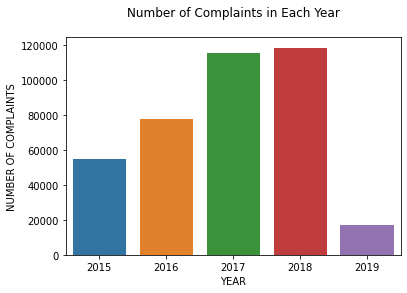

In [15]:
sns.countplot(x = 'year', data = df).set(xlabel = 'YEAR', ylabel = 'NUMBER OF COMPLAINTS', title = 'Number of Complaints in Each Year\n')

We can conclude from the above plot that year 2018 has maximum number of Consumer Complaints and also that Number of Consumer Complaints are increasing from year to year.

#### Plot depicting Number of Consumer Complaints in Each Month

[Text(0.5, 0, 'MONTH'),
 Text(0, 0.5, 'NUMBER OF COMPLAINTS'),
 Text(0.5, 1.0, 'Number of Complaints in Each Month\n')]

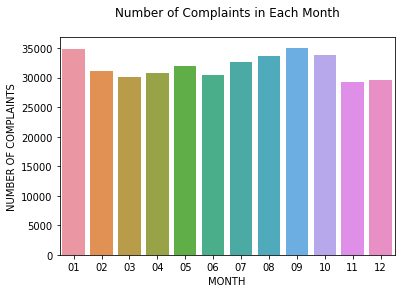

In [16]:
sns.countplot(x = 'month', data = df).set(xlabel = 'MONTH', ylabel = 'NUMBER OF COMPLAINTS', title = 'Number of Complaints in Each Month\n')

We can conclude from the above plot that month 09 "September" has maximum number of Consumer Complaints.

In [17]:
# Let's look at the various categories in which we have to classify each comsumer complaint narrative
category_list = list(df.Product.unique())
for iterator in range(len(category_list)):
    print(iterator + 1, "-->", category_list[iterator])

1 --> Credit reporting, credit repair services, or other personal consumer reports
2 --> Debt collection
3 --> Student loan
4 --> Mortgage
5 --> Credit card or prepaid card
6 --> Checking or savings account
7 --> Money transfer, virtual currency, or money service
8 --> Vehicle loan or lease
9 --> Payday loan, title loan, or personal loan
10 --> Credit card
11 --> Bank account or service
12 --> Credit reporting
13 --> Consumer Loan
14 --> Prepaid card
15 --> Payday loan
16 --> Money transfers
17 --> Other financial service
18 --> Virtual currency


We can see that there are 18 different categories in the data frame. Further we can see that there are some categories which are contained in some or the other category. This can create confusion as well as it will affect our model performance.<br>
So to overcome this problem we can rename those categories. The renaming is done as follows:<br>
 - 'Credit reporting' --> 'Credit reporting & repair services, other personal consumer reports'
 - 'Credit card' --> 'Credit card or prepaid card'
 - 'Prepaid card' --> 'Credit card or prepaid card'
 - 'Payday loan' --> 'Payday loan, title loan, or personal loan'
 - 'Money transfers' --> 'Money transfer, virtual currency, or money service'
 - 'Virtual currency' --> 'Money transfer, virtual currency, or money service'

In [18]:
# Renaming above stated categories
df.Product.replace({'Credit reporting, credit repair services, or other personal consumer reports' : 'Credit reporting & repair services, other personal consumer reports',
                        'Credit reporting' : 'Credit reporting & repair services, other personal consumer reports',
                        'Credit card' : 'Credit card or prepaid card',
                        'Prepaid card' : 'Credit card or prepaid card',
                        'Payday loan' : 'Payday loan, title loan, or personal loan',
                        'Money transfers' : 'Money transfer, virtual currency, or money service',
                        'Virtual currency' : 'Money transfer, virtual currency, or money service'}, inplace=True)

In [19]:
# Let's look at new list of the various categories in which we have to classify each comsumer complaint narrative
category_list = list(df.Product.unique())
for iterator in range(len(category_list)):
    print(iterator + 1, "-->", category_list[iterator])

1 --> Credit reporting & repair services, other personal consumer reports
2 --> Debt collection
3 --> Student loan
4 --> Mortgage
5 --> Credit card or prepaid card
6 --> Checking or savings account
7 --> Money transfer, virtual currency, or money service
8 --> Vehicle loan or lease
9 --> Payday loan, title loan, or personal loan
10 --> Bank account or service
11 --> Consumer Loan
12 --> Other financial service


Here, the number of categories got reduced to 12 from 18.

#### Plot depicting Number of Comsumer Complaints in Each Product Category

Text(0, 0.5, 'Product Category')

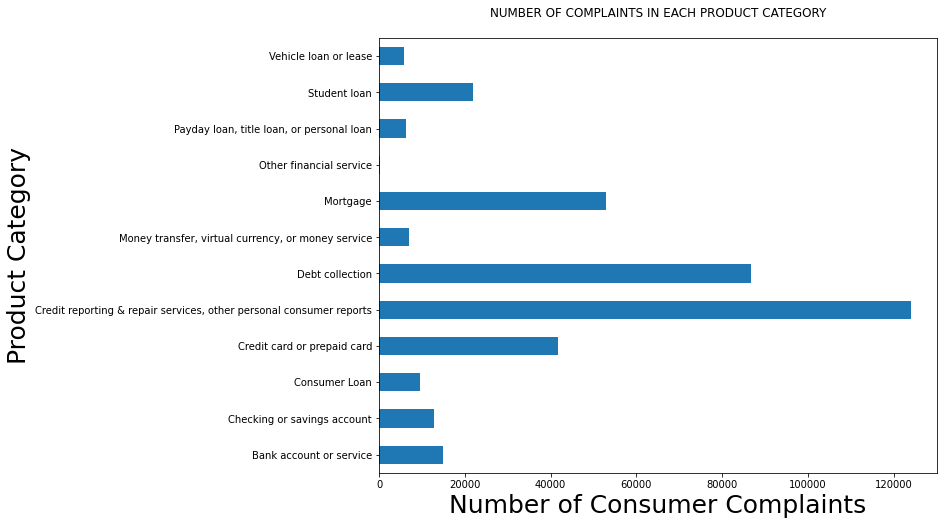

In [20]:
#Let's look at the number of consumer complaints per category. 
fig = plt.figure(figsize = (10, 8))
df.groupby('Product').Consumer_complaint_narrative.count().plot.barh(ylim = 0, title = 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of Consumer Complaints', fontsize = 25)
plt.ylabel('Product Category', fontsize = 25)

In [21]:
# Reducing the data to 15,000 entries by sampling it.
df = df.sample(15000, random_state=1)

Let's convert this data frame with 15,000 non-null entries to a csv file as the size of earlier dataset was very large.

In [22]:
# Converting the data frame to a csv file
df.to_csv('Verzeo_Major_Project_Filtered_Dataset_15000_Instances.csv')

The above new dataset can be downloaded from the following link:<br>
https://drive.google.com/file/d/1wS5bnp1nM8zr8N2zILQsS8jrHueLcH8u/view?usp=sharing

Since we can't represent each category by its name, therefore, let's create a new feature named as 'Category id' which will represent each category as a number.

In [23]:
# Creating new feature 'Category id'
df['Category_id'] = df['Product'].factorize()[0]

In [24]:
# Let's look at Category id of each category
df[['Product', 'Category_id']].drop_duplicates()

,Product,Category_id
310399,"Credit reporting & repair services, other pers...",0
651135,Debt collection,1
515233,Consumer Loan,2
641112,Credit card or prepaid card,3
495158,Mortgage,4
227429,Vehicle loan or lease,5
575099,Student loan,6
401240,"Payday loan, title loan, or personal loan",7
78465,Checking or savings account,8
778060,Bank account or service,9


In [25]:
#Let's look at the number of consumer complaints per Product category. 
print('The Categories in decreasing order of Number of Complaints belonging to that Category is as follows :')
for i, j in dict(df.groupby('Product').Consumer_complaint_narrative.count().sort_values(ascending=False)).items():
    print(" * ", i, '-->', j)

The Categories in decreasing order of Number of Complaints belonging to that Category is as follows :
 *  Credit reporting & repair services, other personal consumer reports --> 4817
 *  Debt collection --> 3389
 *  Mortgage --> 1996
 *  Credit card or prepaid card --> 1712
 *  Student loan --> 830
 *  Bank account or service --> 548
 *  Checking or savings account --> 527
 *  Consumer Loan --> 402
 *  Money transfer, virtual currency, or money service --> 266
 *  Payday loan, title loan, or personal loan --> 253
 *  Vehicle loan or lease --> 250
 *  Other financial service --> 10


### Data Preprocessing and Natural Language Processing

In [26]:
#Converting Text Data to Lowercase
df['Consumer_complaint_narrative'] = df['Consumer_complaint_narrative'].apply(lambda x: ' '.join([i.lower() for i in x.split()]))

In [27]:
df['Consumer_complaint_narrative'].head()

310399    bayview completely ignored laws and is reporti...
186155    inaccurate information no knowledge of account...
651135    on xxxx/xxxx/2016 i received a notice from con...
515233    i have a loan with kia motor finance. i recent...
641112    i have a xxxx big card and made my payment whe...
Name: Consumer_complaint_narrative, dtype: object

In [28]:
#Removing Punctutations
df['Consumer_complaint_narrative'] = df['Consumer_complaint_narrative'].str.replace(r'[^\w\s]', "")

In [29]:
df['Consumer_complaint_narrative'].head()

310399    bayview completely ignored laws and is reporti...
186155    inaccurate information no knowledge of account...
651135    on xxxxxxxx2016 i received a notice from conve...
515233    i have a loan with kia motor finance i recentl...
641112    i have a xxxx big card and made my payment whe...
Name: Consumer_complaint_narrative, dtype: object

In [30]:
#Normalization Dictionaries
#Source of 1st Normalization Dictionary : http://people.eng.unimelb.edu.au/tbaldwin/etc/emnlp2012-lexnorm.tgz
#Source of 2nd Normalization Dictionary : http://luululu.com/tweet/typo-corpus-r1.txt
dico = {}
dico1 = open('doc1.txt', 'rb')
for word in dico1:
    word = word.decode('utf8')
    word = word.split()
    dico[word[0]] = word[1]
dico1.close()
dico2 = open('doc2.txt', 'rb')
for word in dico2:
    word = word.decode('utf8')
    word = word.split()
    dico[word[0]] = word[1]
dico2.close()

In [31]:
#Text Standardization
def txt_std(words):
    list_words = words.split()
    for i in range(len(list_words)):
        if list_words[i] in dico.keys():
            list_words[i] = dico[list_words[i]]
    return ' '.join(list_words)

In [32]:
#Applying Text Standardization
df['Consumer_complaint_narrative'] = df['Consumer_complaint_narrative'].apply(txt_std)

In [33]:
df.Consumer_complaint_narrative.head()

310399    bayview completely ignored laws and is reporti...
186155    inaccurate information no knowledge of account...
651135    on xxxxxxxx2016 i received a notice from conve...
515233    i have a loan with kia motor finance i recentl...
641112    i have a xxxx big card and made my payment whe...
Name: Consumer_complaint_narrative, dtype: object

In [34]:
df['Consumer_complaint_narrative'] = df['Consumer_complaint_narrative'].str.replace(r"xx+\s", "")

In [35]:
df.Consumer_complaint_narrative.head()

310399    bayview completely ignored laws and is reporti...
186155    inaccurate information no knowledge of account...
651135    on xxxxxxxx2016 i received a notice from conve...
515233    i have a loan with kia motor finance i recentl...
641112    i have a big card and made my payment when i g...
Name: Consumer_complaint_narrative, dtype: object

In [36]:
#Removing Stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Consumer_complaint_narrative'] = df['Consumer_complaint_narrative'].apply(lambda x: ' '.join([i for i in x.split() if i not in stop]))

In [37]:
df.Consumer_complaint_narrative.head()

310399    bayview completely ignored laws reporting disp...
186155    inaccurate information knowledge accounts file...
651135    xxxxxxxx2016 received notice convergent collec...
515233    loan kia motor finance recently moved florida ...
641112    big card made payment got paid payment posted ...
Name: Consumer_complaint_narrative, dtype: object

In [38]:
#Correcting Spellings
#from textblob import TextBlob
#df['Consumer_complaint_narrative'] = df['Consumer_complaint_narrative'].apply(lambda x: str(TextBlob(x).correct()))

In [39]:
#Lemmatizing
from textblob import Word
df['Consumer_complaint_narrative'] = df['Consumer_complaint_narrative'].apply(lambda x: ' '.join([Word(i).lemmatize() for i in x.split()]))

In [40]:
df.Consumer_complaint_narrative.head()

310399    bayview completely ignored law reporting dispu...
186155    inaccurate information knowledge account filed...
651135    xxxxxxxx2016 received notice convergent collec...
515233    loan kia motor finance recently moved florida ...
641112    big card made payment got paid payment posted ...
Name: Consumer_complaint_narrative, dtype: object

### Word Clouds for Top 3 Product Categories

 *  Credit reporting & repair services, other personal consumer reports


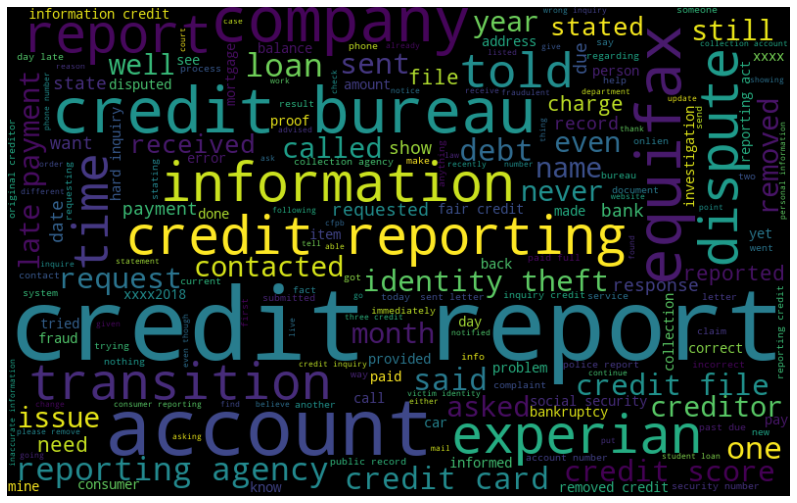

 *  Debt collection


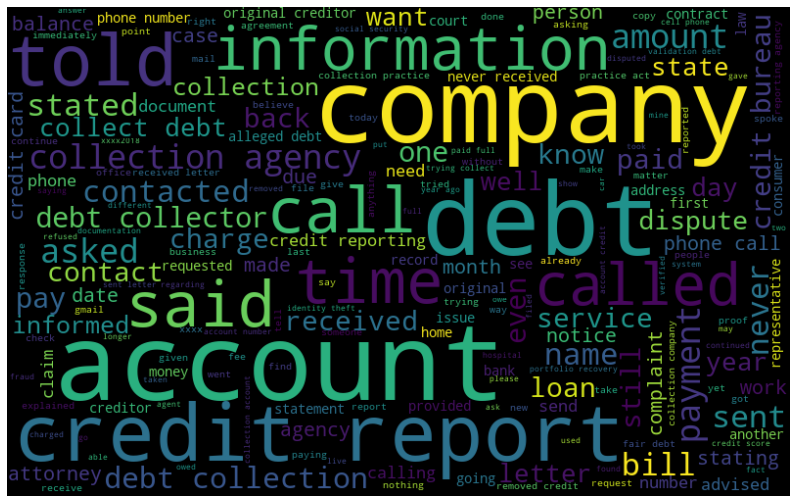

 *  Mortgage


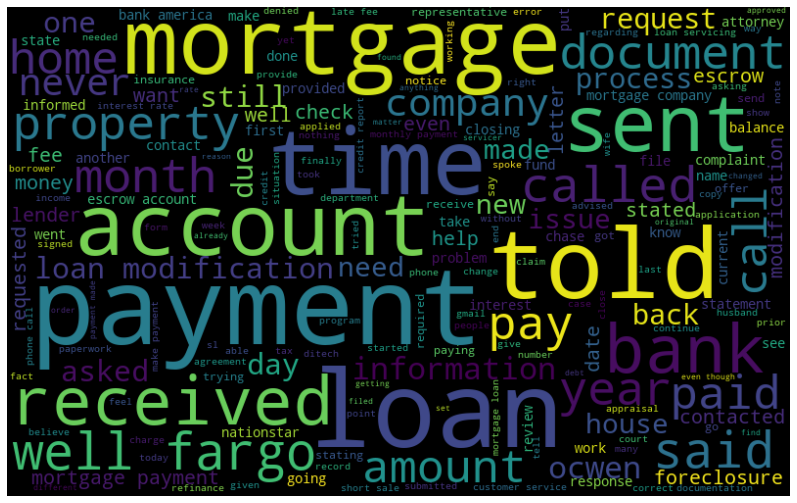

In [41]:
from wordcloud import WordCloud
for p_name in list(dict(df.groupby('Product').Consumer_complaint_narrative.count().sort_values(ascending=False)).keys())[:3]:
    print(" * ", p_name)
    all_words = ' '.join([text for text in df.loc[df['Product'].str.contains(p_name),'Consumer_complaint_narrative']])
    wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)
    plt.figure(figsize = (15, 9))
    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis('off')
    plt.show()

In [42]:
#Companies against whom these complaints have been filed.
#Let's check the companies against whom consumers have filed these complaints.
companies = df.groupby('Company').Company.count().sort_values(ascending=False)
print("Number of Companies having Consumer Complaints =", len(companies))
#Top 5 companies with largest number of consumer complaints
companies.head()

Number of Companies having Consumer Complaints = 1287


Company
EQUIFAX, INC.                             1483
Experian Information Solutions Inc.       1225
TRANSUNION INTERMEDIATE HOLDINGS, INC.    1196
WELLS FARGO & COMPANY                      552
CITIBANK, N.A.                             546
Name: Company, dtype: int64

#### Plot depicting Number of Consumer Complaints in Top 20 Company

Text(0.5, 1.0, 'Number of Consumer Complaints in Top 20 Companies')

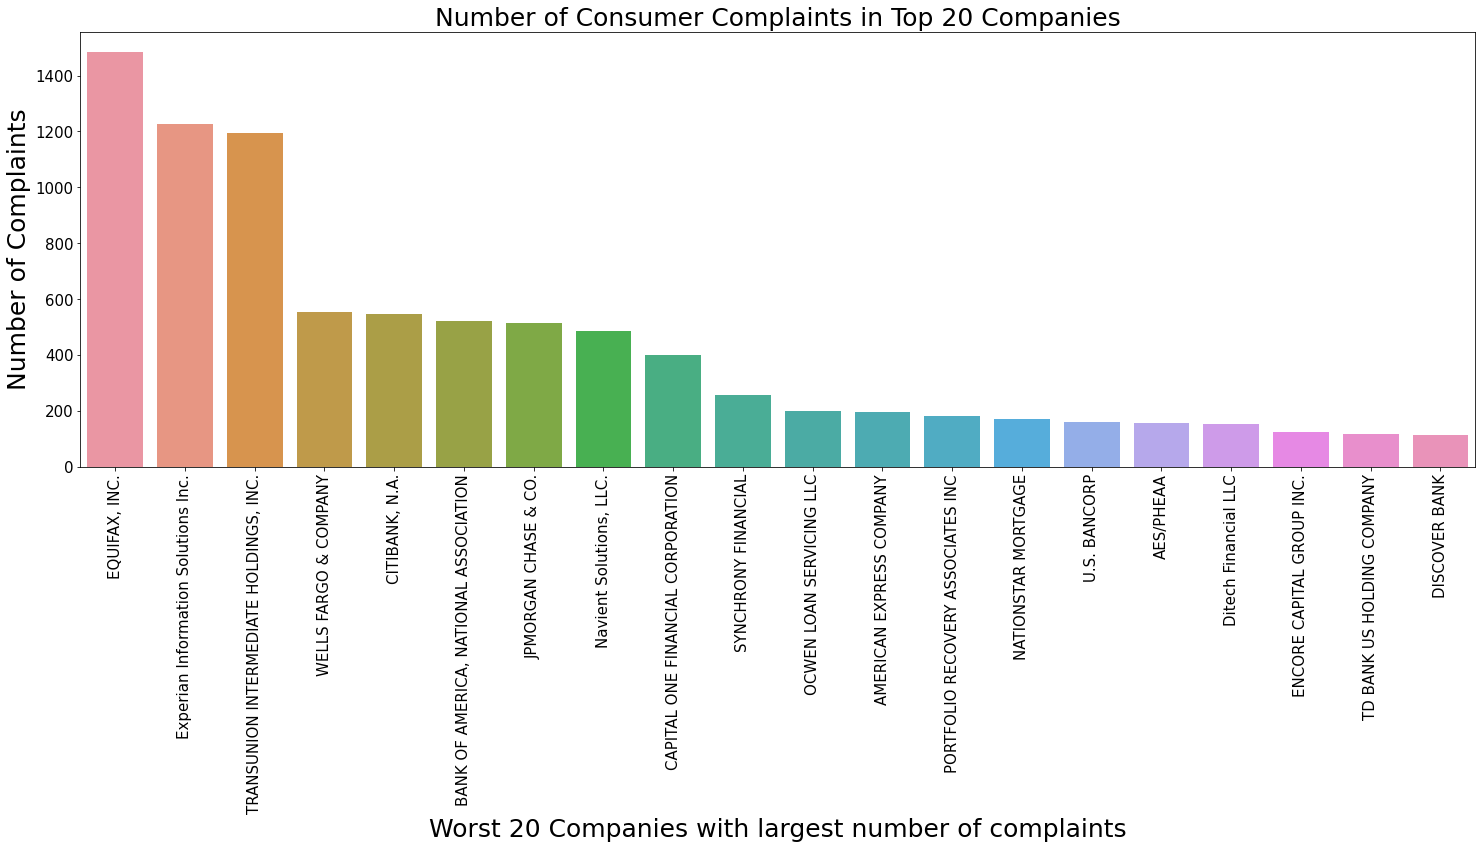

In [43]:
#Top 20 companies with largest number of complaints.
plt.figure(figsize = (25, 8))
plt.xticks(rotation = 90, fontsize = 15, ha = "center")
plt.yticks(fontsize = 15)
g = sns.barplot(companies.index[0:20], companies.values[0:20])
g.set_xlabel("Worst 20 Companies with largest number of complaints", fontsize = 25)
g.set_ylabel("Number of Complaints", fontsize = 25)
g.set_title("Number of Consumer Complaints in Top 20 Companies", fontsize = 25)

#### Plot depicting Company's Response to various Consumer Complaints

Text(0.5, 1.0, "Company's Response v/s Number of Complaints")

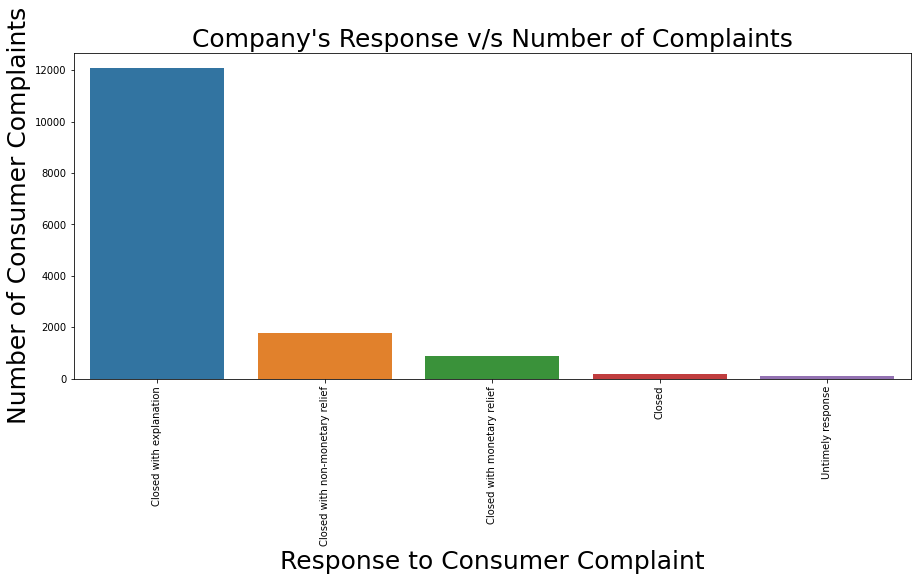

In [44]:
#Company's response to Consumer
#What are responses given by companies to consumers? Does a company is more likely to respond in a paritcular way?
plt.figure(figsize = (15, 6))
plt.xticks(rotation = "90", ha = "center", size = 10)
grh = sns.countplot(x = "Company_response_to_consumer", data = df, order = df['Company_response_to_consumer'].value_counts().index)
grh.set_xlabel("Response to Consumer Complaint", fontsize = 25)
grh.set_ylabel("Number of Consumer Complaints", fontsize = 25)
grh.set_title("Company's Response v/s Number of Complaints", fontsize = 25)

Most of complaints are closed with explanation without any monetory or non-monetary relief.

#### Plot depicting how many Complainants belong to a State

[Text(0.5, 0, 'STATE'),
 Text(0, 0.5, 'NUMBER OF COMPLAINTS'),
 Text(0.5, 1.0, 'Number of Complaints in Each State\n')]

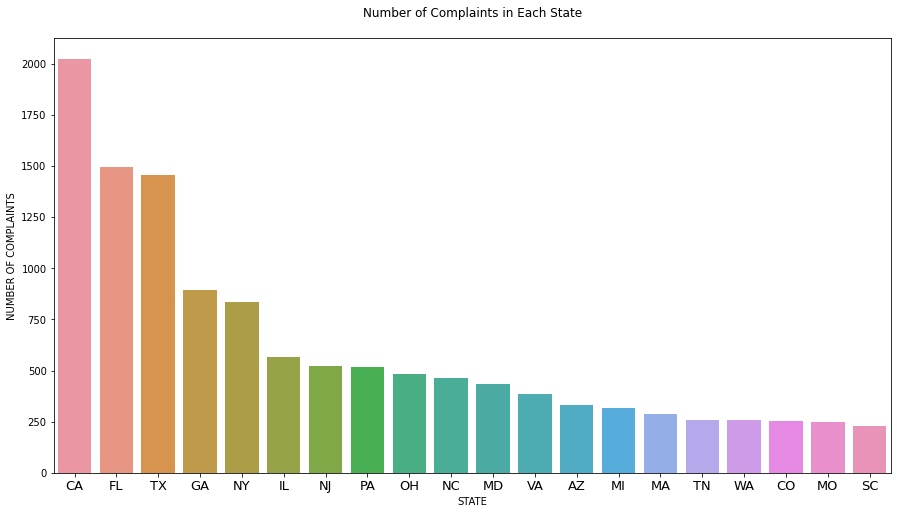

In [45]:
#Top 20 states with most number of complaints
gp_state = df.groupby('State')
plt.figure(figsize = (15, 8))
plt.xticks(rotation = "0", ha = "center", size = 13)
state_count = gp_state.State.count().sort_values(ascending = False)
sns.barplot(state_count.index[0:20], state_count.values[0:20]).set(xlabel = 'STATE', ylabel = 'NUMBER OF COMPLAINTS', title = 'Number of Complaints in Each State\n')

### Geospatial Analysis of Consumers and their Complaints

In [46]:
#Geospatial Analysis
import geopandas as gpd

In [47]:
#We will be removing shape data for non-contiguous states to get a better view of contiguous states
map_df = gpd.read_file('cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
#Selecting only continuous US States
map_df = map_df[~map_df['STUSPS'].isin(["AK", "PR", "GU", "MP", "VI", "AS", "HI"])]

In [48]:
map_df

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


#### Plot depicting the US State Boundry Map

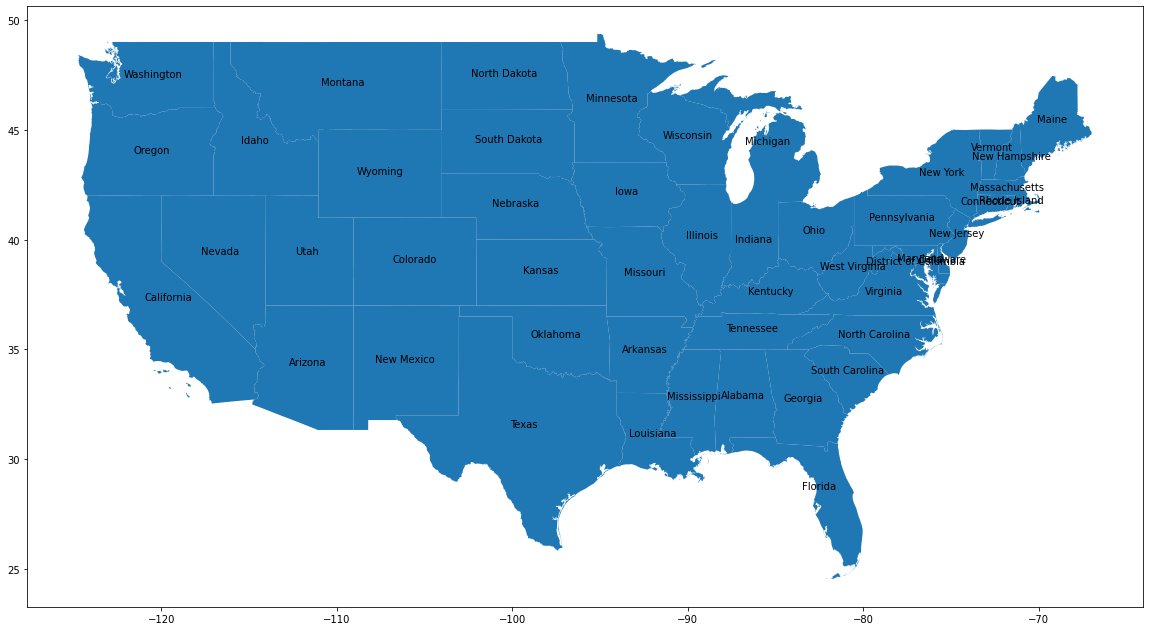

In [49]:
#Plot of the us state boundary map
fig, ax = plt.subplots(1, figsize = (20, 12))
map_df.plot(ax = ax)
v = map_df.apply(lambda x: ax.annotate(s = x.NAME, xy = x.geometry.centroid.coords[0], ha = 'center'), axis = 1)

#### Plot Depicting Consumer Complaints belonging to each State

In [50]:
merged_df = map_df.merge(pd.Series.to_frame(gp_state.State.count()), left_on = "STUSPS", right_index = True, how = "left")

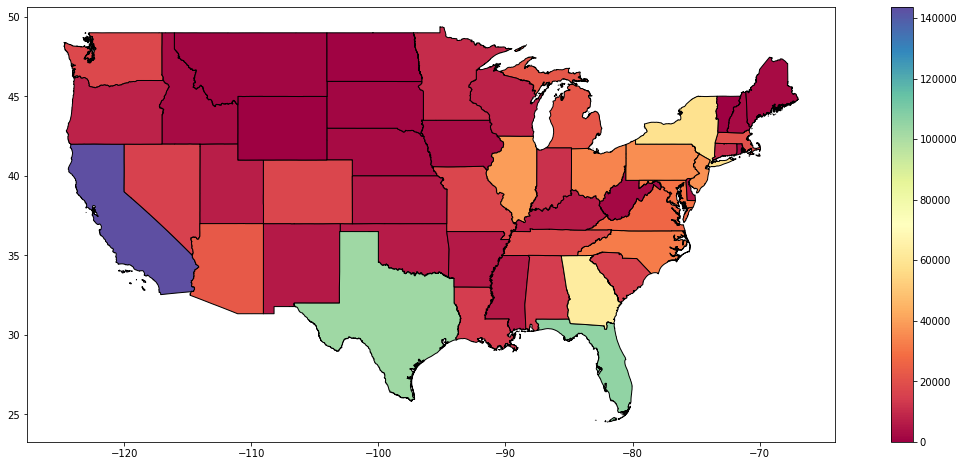

In [51]:
fig, ax = plt.subplots(1, figsize = (20, 8))
sm = plt.cm.ScalarMappable(cmap = "Spectral", norm = plt.Normalize(vmin = 0.0, vmax = 143662))
sm._A = []
merged_df.plot(column = "State", ax = ax, cmap = "Spectral", linewidth = 1.0, edgecolor = 'black')
fig.colorbar(sm)

**California**, **Florida**, **Texas** and **New York** are the states which have most Number of Complainants.

#### Plots depicting Distribution of Product Categories across States

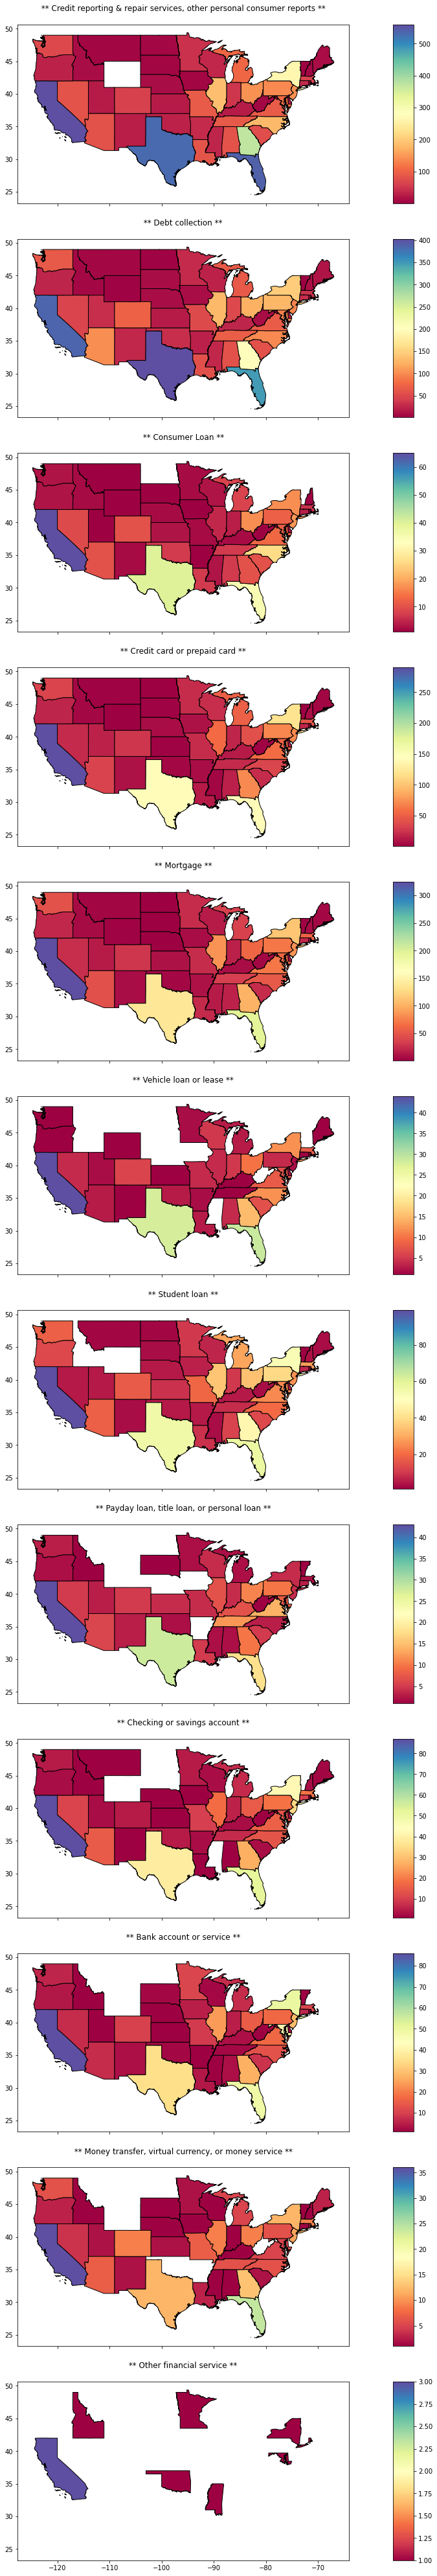

In [52]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax  = plt.subplots(12, figsize=(20, 72), sharex = True, sharey = True)
def prod_to_state(ax, product):
    gp_state = df[df.Product == product].groupby('State').State.count()
    merged_df = map_df.merge(pd.Series.to_frame(gp_state), left_on = "STUSPS", right_index = True, how = "left")
    sm = plt.cm.ScalarMappable(cmap = "Spectral", norm = plt.Normalize(vmin = gp_state.min(), vmax = gp_state.max()))
    sm._A = []
    merged_df.plot(column = "State", ax = ax, cmap = "Spectral", linewidth = 1.0, edgecolor = 'black')
    divider = make_axes_locatable(ax)
    fig.colorbar(sm, cax = divider.append_axes("right", size = "5%", pad = 0.05))
    ax.set_title(' ** ' + product + ' ** \n')
p = df.Product.unique()
for i in range(len(p)):
    prod_to_state(ax[i], p[i])

### Splitting the data into Train and Test sets

Here, feature (X) is Consumer Complaint Narrative and target (y) is Product. We are going to split the data into train (75%) and test (25%) sets.

In [53]:
X = df['Consumer_complaint_narrative']
y = df['Product']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size = 0.80, random_state = 0)

### Feature Engineering of Consumer Complaints with TF-IDF Vectorizer

 - As we know that the consumer complaints present in our data frame needs to be transformed into vectors so that our model can make predictions. Here, we are going to use **TFIDFVectorizer** to know that how much a word is important to a product in the collection of all product categories.<br>
 - **TFIDF** stands for **Term Frequency - Inverse Document Frequency** which is defined as the product of the TF and IDF scores of a particular word.
 - **TF (Term Frequency) score** is defined as the ratio of Number of times a particular word appeared in a complaint to the Total Number of words in the complaint.
 - **IDF (Inverse Document Frequency) score** is a logarithmically scaled inverse fraction obtained by dividing Number of complaints with the Number of Complaints in which that particular word appeared, and then taking the logarithm of that quotient.

In [55]:
#label encoding target variable
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y_train = enc.fit_transform(y_train)
y_test = enc.fit_transform(y_test)

In [56]:
#tf-idf vector representation
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer = 'word', token_pattern = r'\w{1,}', max_features = 5000)
tfidf_vect.fit(df['Consumer_complaint_narrative'])
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

### Multi - Class Classification Models / Ensemble Machine Learning Modelling

The classification models evaluated are:
 - Random Forest Classifier
 - Linear Support Vector Machine
 - Multinomial Naive Bayes
 - Logistic Regression
 - K Nearest Neighbors Classifier
 - Decision Tree Classifier

### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression()
lr_params = {'C' : [int(x) for x in np.linspace(1, 10, 10)]}
grid_lr = GridSearchCV(estimator = lr_clf, param_grid = lr_params, cv = 5, n_jobs = -1)
grid_lr.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [58]:
#best_params_ : Parameter setting that gives the best results on the hold out data.
print("Parameter setting that gave the best results on the hold out data -", grid_lr.best_params_)
#best_score_ : Mean cross-validated score of the best_estimator
print("Mean cross-validated score of the best_estimator =", grid_lr.best_score_)

Parameter setting that gave the best results on the hold out data - {'C': 3}
Mean cross-validated score of the best_estimator = 0.77425


In [59]:
final_lr = LogisticRegression(C = 5)
final_lr.fit(X_train_tfidf, y_train)

LogisticRegression(C=5)

In [60]:
#Accuracy score of Logistic Regression
from sklearn import metrics
final_lr_predict = final_lr.predict(X_test_tfidf)
lr_accuracy = metrics.accuracy_score(final_lr_predict, y_test)
print("Logistic Regression : Accuracy =", round(lr_accuracy * 100, 2), "%")

Logistic Regression : Accuracy = 76.4 %


In [61]:
#Classification report of Logistic Regression
from sklearn.metrics import classification_report
print(classification_report(y_test, final_lr_predict, target_names = df['Product'].unique()))

                                                                     precision    recall  f1-score   support

Credit reporting & repair services, other personal consumer reports       0.47      0.46      0.47       110
                                                    Debt collection       0.55      0.50      0.52       105
                                                      Consumer Loan       0.43      0.28      0.34        80
                                        Credit card or prepaid card       0.72      0.73      0.72       342
                                                           Mortgage       0.80      0.82      0.81       964
                                              Vehicle loan or lease       0.76      0.81      0.79       678
                                                       Student loan       0.73      0.57      0.64        53
                          Payday loan, title loan, or personal loan       0.88      0.94      0.91       399
                  

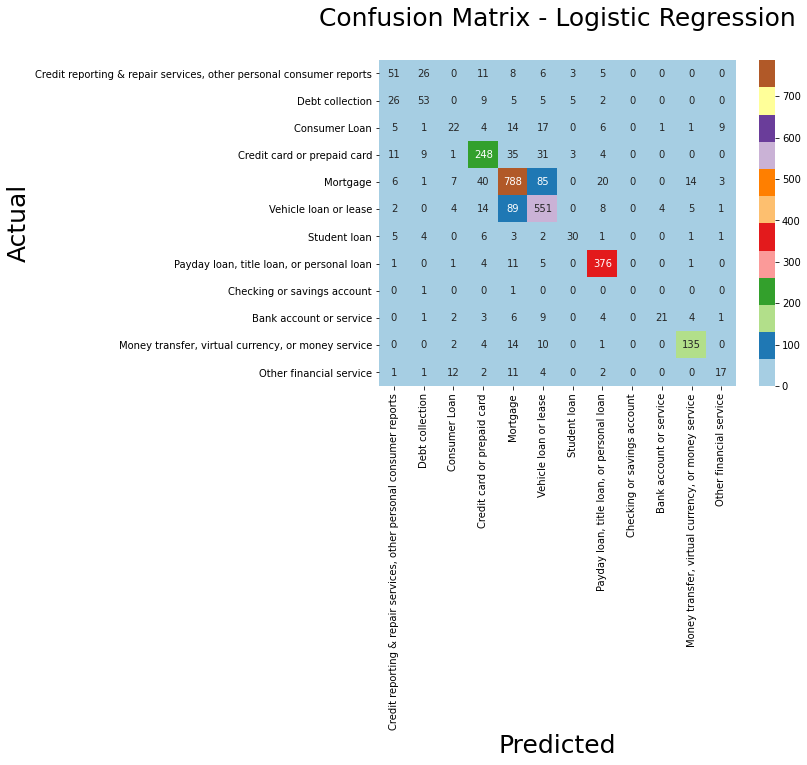

In [62]:
#Confusion Matrix of Logistic Regression
#A Confusion Matrix is a table which rows represent the actual class and columns represents the predicted class
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, final_lr_predict)
fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(conf_mat, annot = True, fmt = "d", cmap = "Paired", xticklabels = df['Product'].unique(), yticklabels = df['Product'].unique())
plt.ylabel('Actual', fontsize = 25)
plt.xlabel('Predicted', fontsize = 25)
plt.title('Confusion Matrix - Logistic Regression\n', fontsize = 25)
plt.show()

In [63]:
columns = ["Model Name", "Train_Accuracy", "Train_Precision", "Train_Recall", "Train_F1-Score", "Test_Accuracy", "Test_Precision", "Test_Recall", "Test_F1-Score"]
Models_Accuracy = pd.DataFrame(columns = columns)

In [64]:
from sklearn.metrics import *
Models_Accuracy = Models_Accuracy.append(dict(zip(columns, ["Logistic Regression", 
                                                            100 * accuracy_score(y_train , final_lr.predict(X_train_tfidf)), 
                                                            100 * precision_score(y_train, final_lr.predict(X_train_tfidf), average = 'macro'), 
                                                            100 * recall_score(y_train, final_lr.predict(X_train_tfidf), average = 'micro'), 
                                                            100 * f1_score(y_train, final_lr.predict(X_train_tfidf), average = 'weighted'), 
                                                            100 * accuracy_score(y_test , final_lr.predict(X_test_tfidf)), 
                                                            100 * precision_score(y_test , final_lr.predict(X_test_tfidf), average = 'macro'),
                                                            100 * recall_score(y_test , final_lr.predict(X_test_tfidf), average = 'macro'),
                                                            100 * f1_score(y_test , final_lr.predict(X_test_tfidf), average = 'macro')])), ignore_index = True)

In [65]:
Models_Accuracy

,Model Name,Train_Accuracy,Train_Precision,Train_Recall,Train_F1-Score,Test_Accuracy,Test_Precision,Test_Recall,Test_F1-Score
0,Logistic Regression,93.758333,87.087711,93.758333,93.703086,76.4,62.620358,55.600563,58.140555


### Linear Support Vector Machine

In [66]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC()
svc_params = {'C' : [0.01, 0.1, 1, 10, 100, 1000]}
grid_svc = GridSearchCV(estimator = svc_model, param_grid = svc_params, cv = 5, n_jobs = -1)
grid_svc.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]})

In [67]:
#best_params_ : Parameter setting that gives the best results on the hold out data.
print("Parameter setting that gave the best results on the hold out data -", grid_lr.best_params_)
#best_score_ : Mean cross-validated score of the best_estimator
print("Mean cross-validated score of the best_estimator =", grid_lr.best_score_)

Parameter setting that gave the best results on the hold out data - {'C': 3}
Mean cross-validated score of the best_estimator = 0.77425


In [68]:
final_svc = LinearSVC(C = 0.1)
final_svc.fit(X_train_tfidf, y_train)

LinearSVC(C=0.1)

In [69]:
#Accuracy score of Linear Support Vector Machine
final_svc_predict = final_svc.predict(X_test_tfidf)
svc_accuracy = metrics.accuracy_score(final_svc_predict, y_test)
print("Linear SVC : Accuracy =", round(svc_accuracy * 100, 2), "%")

Linear SVC : Accuracy = 76.53 %


In [70]:
#Classification report of Linear Support Vector Machine
print(classification_report(y_test, final_svc_predict, target_names = df['Product'].unique()))

                                                                     precision    recall  f1-score   support

Credit reporting & repair services, other personal consumer reports       0.47      0.30      0.37       110
                                                    Debt collection       0.55      0.49      0.52       105
                                                      Consumer Loan       0.53      0.21      0.30        80
                                        Credit card or prepaid card       0.71      0.76      0.73       342
                                                           Mortgage       0.80      0.84      0.82       964
                                              Vehicle loan or lease       0.76      0.83      0.79       678
                                                       Student loan       0.81      0.57      0.67        53
                          Payday loan, title loan, or personal loan       0.85      0.96      0.90       399
                  

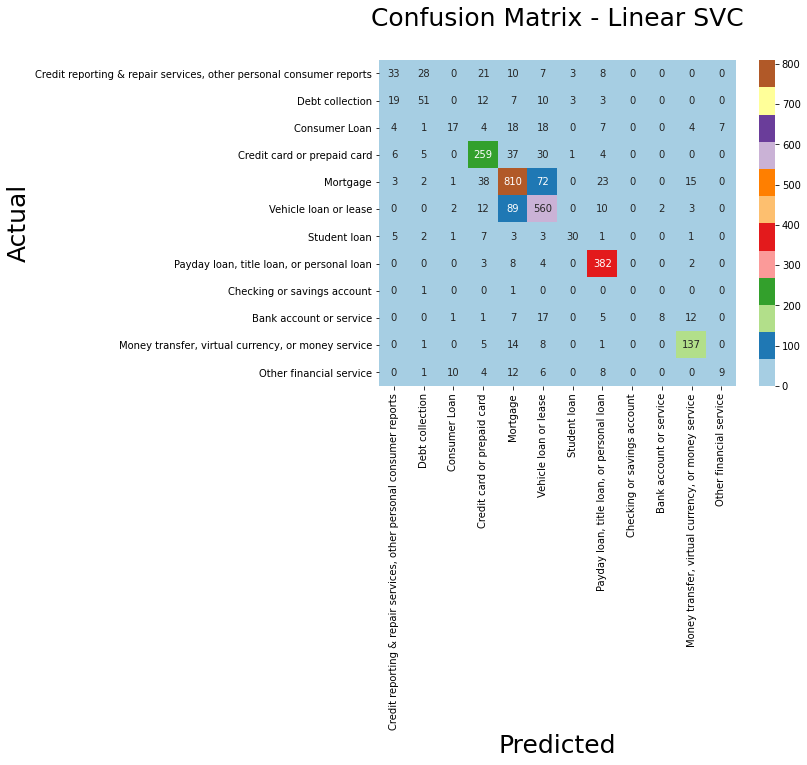

In [71]:
#Confusion Matrix of Linear Support Vector Machine
conf_mat = confusion_matrix(y_test, final_svc_predict)
fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(conf_mat, annot = True, fmt = "d", cmap = "Paired", xticklabels = df['Product'].unique(), yticklabels = df['Product'].unique())
plt.ylabel('Actual', fontsize = 25) 
plt.xlabel('Predicted', fontsize = 25)
plt.title('Confusion Matrix - Linear SVC\n', fontsize = 25)
plt.show()

In [72]:
Models_Accuracy = Models_Accuracy.append(dict(zip(columns, ["Linear SVC", 
                                                            100 * accuracy_score(y_train , final_svc.predict(X_train_tfidf)), 
                                                            100 * precision_score(y_train, final_svc.predict(X_train_tfidf), average = 'macro'), 
                                                            100 * recall_score(y_train, final_svc.predict(X_train_tfidf), average = 'micro'), 
                                                            100 * f1_score(y_train, final_svc.predict(X_train_tfidf), average = 'weighted'), 
                                                            100 * accuracy_score(y_test , final_svc.predict(X_test_tfidf)), 
                                                            100 * precision_score(y_test , final_svc.predict(X_test_tfidf), average = 'macro'),
                                                            100 * recall_score(y_test , final_svc.predict(X_test_tfidf), average = 'macro'),
                                                            100 * f1_score(y_test , final_svc.predict(X_test_tfidf), average = 'macro')])), ignore_index = True)

In [73]:
Models_Accuracy

,Model Name,Train_Accuracy,Train_Precision,Train_Recall,Train_F1-Score,Test_Accuracy,Test_Precision,Test_Recall,Test_F1-Score
0,Logistic Regression,93.758333,87.087711,93.758333,93.703086,76.400000,62.620358,55.600563,58.140555
1,Linear SVC,85.241667,79.401227,85.241667,84.695331,76.533333,63.580212,50.894392,53.631694


### Multinomial Naive Bayes

In [74]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [75]:
nb_correct_train = (y_train == nb_model.predict(X_train_tfidf)).sum()

In [76]:
nb_correct_train

8827

In [77]:
nb_incorrect_train = y_train.size - nb_correct_train

In [78]:
nb_incorrect_train

3173

In [79]:
nb_correct_test = (y_test == nb_model.predict(X_test_tfidf)).sum()

In [80]:
nb_correct_test

2087

In [81]:
nb_incorrect_test = y_test.size - nb_correct_test

In [82]:
nb_incorrect_test

913

In [83]:
#Accuracy score of Multinomial Naive Bayes
nb_predict = nb_model.predict(X_test_tfidf)
nb_accuracy = metrics.accuracy_score(nb_predict, y_test)
print("Linear SVC : Accuracy =", round(nb_accuracy * 100, 2), "%")

Linear SVC : Accuracy = 69.57 %


In [84]:
#Classification report of Multinomial Naive Bayes
print(classification_report(y_test, nb_predict, target_names = df['Product'].unique()))

                                                                     precision    recall  f1-score   support

Credit reporting & repair services, other personal consumer reports       0.57      0.04      0.07       110
                                                    Debt collection       0.56      0.05      0.09       105
                                                      Consumer Loan       0.67      0.03      0.05        80
                                        Credit card or prepaid card       0.52      0.69      0.59       342
                                                           Mortgage       0.69      0.90      0.79       964
                                              Vehicle loan or lease       0.72      0.75      0.74       678
                                                       Student loan       1.00      0.02      0.04        53
                          Payday loan, title loan, or personal loan       0.78      0.92      0.85       399
                  

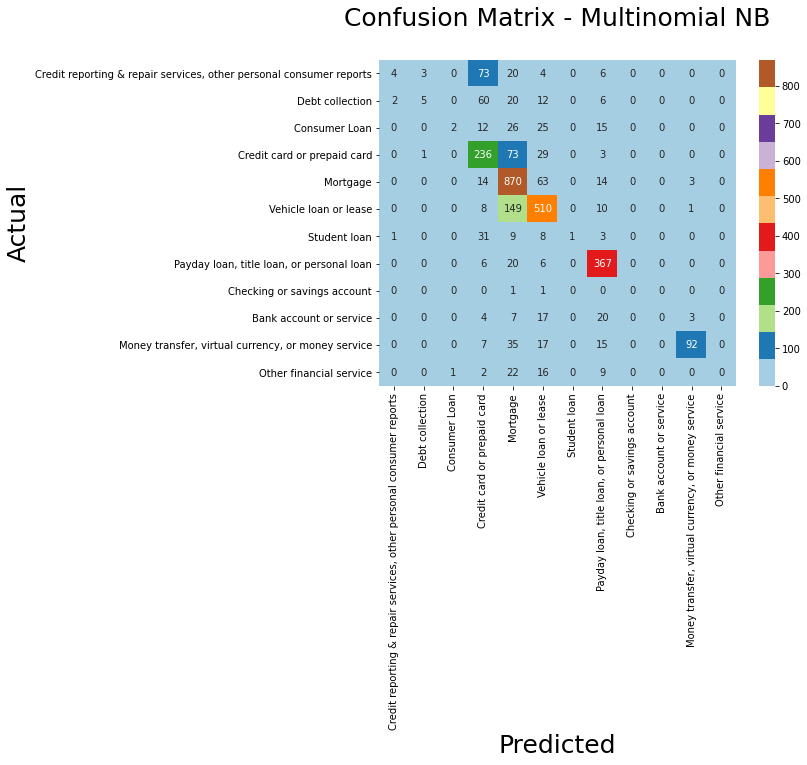

In [85]:
#Confusion Matrix of Multinomial Naive Bayes
conf_mat = confusion_matrix(y_test, nb_predict)
fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(conf_mat, annot = True, fmt = "d", cmap = "Paired", xticklabels = df['Product'].unique(), yticklabels = df['Product'].unique())
plt.ylabel('Actual', fontsize = 25) 
plt.xlabel('Predicted', fontsize = 25)
plt.title('Confusion Matrix - Multinomial NB\n', fontsize = 25)
plt.show()

In [86]:
Models_Accuracy = Models_Accuracy.append(dict(zip(columns, ["Multinomial NB", 
                                                            100 * accuracy_score(y_train , nb_model.predict(X_train_tfidf)), 
                                                            100 * precision_score(y_train, nb_model.predict(X_train_tfidf), average = 'macro'), 
                                                            100 * recall_score(y_train, nb_model.predict(X_train_tfidf), average = 'micro'), 
                                                            100 * f1_score(y_train, nb_model.predict(X_train_tfidf), average = 'weighted'), 
                                                            100 * accuracy_score(y_test , nb_model.predict(X_test_tfidf)), 
                                                            100 * precision_score(y_test , nb_model.predict(X_test_tfidf), average = 'macro'),
                                                            100 * recall_score(y_test , nb_model.predict(X_test_tfidf), average = 'macro'),
                                                            100 * f1_score(y_test , nb_model.predict(X_test_tfidf), average = 'macro')])), ignore_index = True)

In [87]:
Models_Accuracy

,Model Name,Train_Accuracy,Train_Precision,Train_Recall,Train_F1-Score,Test_Accuracy,Test_Precision,Test_Recall,Test_F1-Score
0,Logistic Regression,93.758333,87.087711,93.758333,93.703086,76.400000,62.620358,55.600563,58.140555
1,Linear SVC,85.241667,79.401227,85.241667,84.695331,76.533333,63.580212,50.894392,53.631694
2,Multinomial NB,73.558333,69.719660,73.558333,68.908968,69.566667,53.694419,32.888562,32.475852


### Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators = 100, max_depth = 10, criterion = 'entropy')
rfc_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10)

In [89]:
rfc_pred = rfc_model.predict(X_test_tfidf)

In [90]:
rfc_test_pred_correct = (rfc_pred == y_test).sum()
rfc_test_pred_incorrect = (rfc_pred != y_test).sum()

In [91]:
rfc_test_pred_correct

1774

In [92]:
rfc_test_pred_incorrect

1226

In [93]:
#Accuracy score of Random Forest Classifier
rfc_predict = rfc_model.predict(X_test_tfidf)
rfc_accuracy = metrics.accuracy_score(rfc_predict, y_test)
print("Random Forest Classifier : Accuracy =", round(rfc_accuracy * 100, 2), "%")

Random Forest Classifier : Accuracy = 59.13 %


In [94]:
#Classification report of Random Forest Classifier
print(classification_report(y_test, rfc_predict, target_names = df['Product'].unique()))

                                                                     precision    recall  f1-score   support

Credit reporting & repair services, other personal consumer reports       0.00      0.00      0.00       110
                                                    Debt collection       0.73      0.08      0.14       105
                                                      Consumer Loan       0.00      0.00      0.00        80
                                        Credit card or prepaid card       0.69      0.34      0.46       342
                                                           Mortgage       0.49      0.96      0.65       964
                                              Vehicle loan or lease       0.73      0.48      0.58       678
                                                       Student loan       0.00      0.00      0.00        53
                          Payday loan, title loan, or personal loan       0.81      0.79      0.80       399
                  

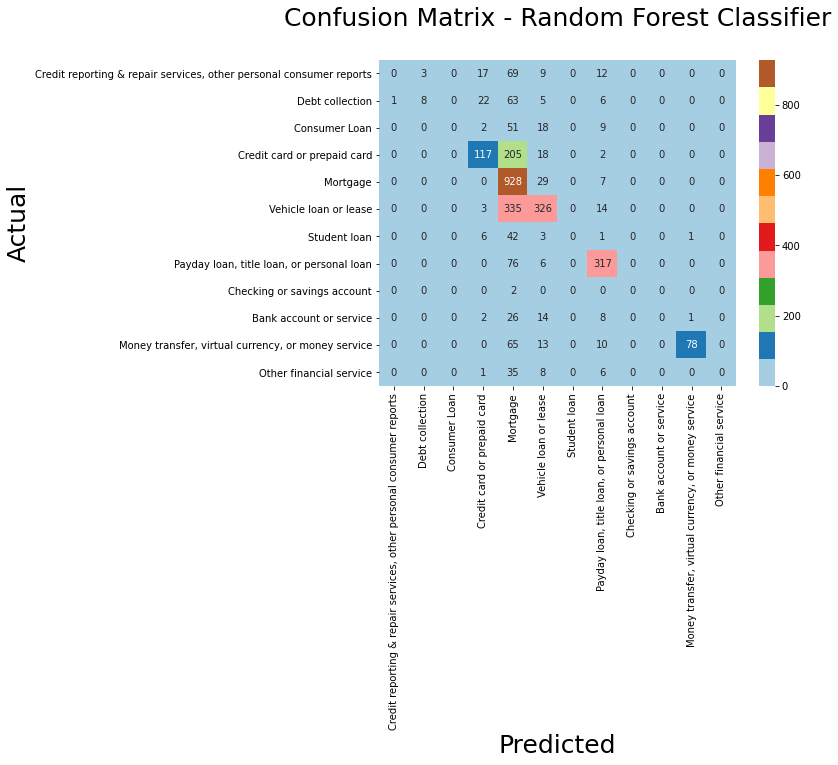

In [95]:
#Confusion Matrix of Random Forest Classifier
conf_mat = confusion_matrix(y_test, rfc_predict)
fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(conf_mat, annot = True, fmt = "d", cmap = "Paired", xticklabels = df['Product'].unique(), yticklabels = df['Product'].unique())
plt.ylabel('Actual', fontsize = 25) 
plt.xlabel('Predicted', fontsize = 25)
plt.title('Confusion Matrix - Random Forest Classifier\n', fontsize = 25)
plt.show()

In [96]:
Models_Accuracy = Models_Accuracy.append(dict(zip(columns, ["Random Forest Classifier", 
                                                            100 * accuracy_score(y_train , rfc_model.predict(X_train_tfidf)), 
                                                            100 * precision_score(y_train, rfc_model.predict(X_train_tfidf), average = 'macro'), 
                                                            100 * recall_score(y_train, rfc_model.predict(X_train_tfidf), average = 'micro'), 
                                                            100 * f1_score(y_train, rfc_model.predict(X_train_tfidf), average = 'weighted'), 
                                                            100 * accuracy_score(y_test , rfc_model.predict(X_test_tfidf)), 
                                                            100 * precision_score(y_test , rfc_model.predict(X_test_tfidf), average = 'macro'),
                                                            100 * recall_score(y_test , rfc_model.predict(X_test_tfidf), average = 'macro'),
                                                            100 * f1_score(y_test , rfc_model.predict(X_test_tfidf), average = 'macro')])), ignore_index = True)

In [97]:
Models_Accuracy

,Model Name,Train_Accuracy,Train_Precision,Train_Recall,Train_F1-Score,Test_Accuracy,Test_Precision,Test_Recall,Test_F1-Score
0,Logistic Regression,93.758333,87.087711,93.758333,93.703086,76.400000,62.620358,55.600563,58.140555
1,Linear SVC,85.241667,79.401227,85.241667,84.695331,76.533333,63.580212,50.894392,53.631694
2,Multinomial NB,73.558333,69.719660,73.558333,68.908968,69.566667,53.694419,32.888562,32.475852
3,Random Forest Classifier,65.833333,83.535026,65.833333,62.679642,59.133333,36.786941,26.051192,27.148975


### Decision Tree Classifier

In [98]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(random_state = 0)
dtc_model.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(random_state=0)

In [99]:
dtc_pred = dtc_model.predict(X_test_tfidf)

In [100]:
dtc_test_pred_correct = (dtc_pred == y_test).sum()
dtc_test_pred_incorrect = (dtc_pred != y_test).sum()

In [101]:
dtc_test_pred_correct

1927

In [102]:
dtc_test_pred_incorrect

1073

In [103]:
#Accuracy score of Decision Tree Classifier
dtc_predict = dtc_model.predict(X_test_tfidf)
dtc_accuracy = metrics.accuracy_score(dtc_predict, y_test)
print("Decision Tree Classifier : Accuracy =", round(dtc_accuracy * 100, 2), "%")

Decision Tree Classifier : Accuracy = 64.23 %


In [104]:
#Classification report of Decision Tree Classifier
print(classification_report(y_test, dtc_predict, target_names = df['Product'].unique()))

                                                                     precision    recall  f1-score   support

Credit reporting & repair services, other personal consumer reports       0.26      0.30      0.28       110
                                                    Debt collection       0.37      0.34      0.36       105
                                                      Consumer Loan       0.26      0.21      0.23        80
                                        Credit card or prepaid card       0.58      0.58      0.58       342
                                                           Mortgage       0.74      0.73      0.73       964
                                              Vehicle loan or lease       0.67      0.69      0.68       678
                                                       Student loan       0.27      0.32      0.29        53
                          Payday loan, title loan, or personal loan       0.77      0.79      0.78       399
                  

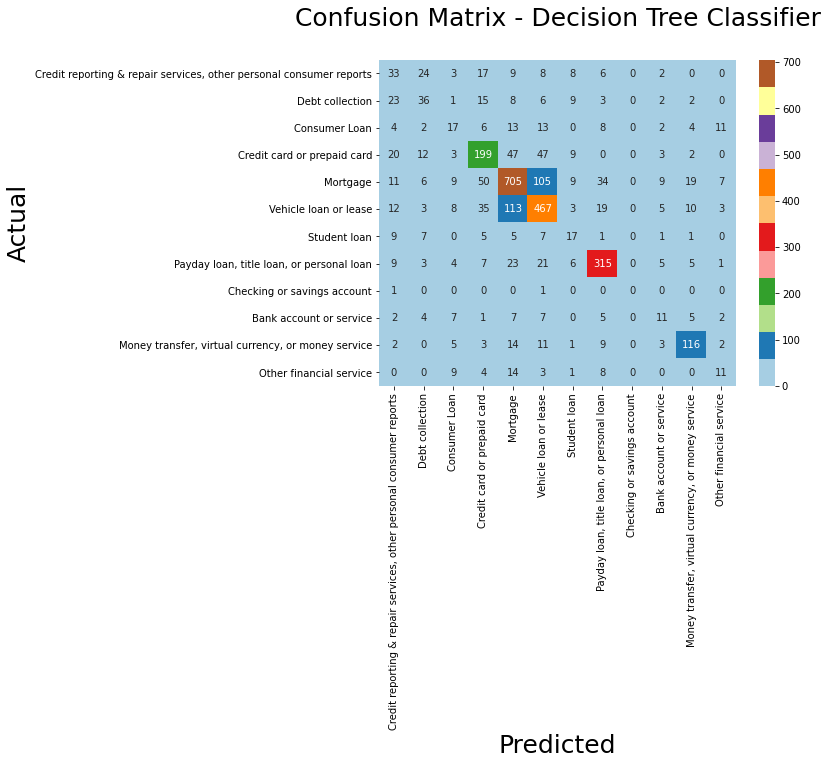

In [105]:
#Confusion Matrix of Decision Tree Classifier
conf_mat = confusion_matrix(y_test, dtc_predict)
fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(conf_mat, annot = True, fmt = "d", cmap = "Paired", xticklabels = df['Product'].unique(), yticklabels = df['Product'].unique())
plt.ylabel('Actual', fontsize = 25) 
plt.xlabel('Predicted', fontsize = 25)
plt.title('Confusion Matrix - Decision Tree Classifier\n', fontsize = 25)
plt.show()

In [106]:
Models_Accuracy = Models_Accuracy.append(dict(zip(columns, ["Decision Tree Classifier", 
                                                            100 * accuracy_score(y_train , dtc_model.predict(X_train_tfidf)), 
                                                            100 * precision_score(y_train, dtc_model.predict(X_train_tfidf), average = 'macro'), 
                                                            100 * recall_score(y_train, dtc_model.predict(X_train_tfidf), average = 'micro'), 
                                                            100 * f1_score(y_train, dtc_model.predict(X_train_tfidf), average = 'weighted'), 
                                                            100 * accuracy_score(y_test , dtc_model.predict(X_test_tfidf)), 
                                                            100 * precision_score(y_test , dtc_model.predict(X_test_tfidf), average = 'macro'),
                                                            100 * recall_score(y_test , dtc_model.predict(X_test_tfidf), average = 'macro'),
                                                            100 * f1_score(y_test , dtc_model.predict(X_test_tfidf), average = 'macro')])), ignore_index = True)

In [107]:
Models_Accuracy

,Model Name,Train_Accuracy,Train_Precision,Train_Recall,Train_F1-Score,Test_Accuracy,Test_Precision,Test_Recall,Test_F1-Score
0,Logistic Regression,93.758333,87.087711,93.758333,93.703086,76.400000,62.620358,55.600563,58.140555
1,Linear SVC,85.241667,79.401227,85.241667,84.695331,76.533333,63.580212,50.894392,53.631694
2,Multinomial NB,73.558333,69.719660,73.558333,68.908968,69.566667,53.694419,32.888562,32.475852
3,Random Forest Classifier,65.833333,83.535026,65.833333,62.679642,59.133333,36.786941,26.051192,27.148975
4,Decision Tree Classifier,99.983333,99.991759,99.983333,99.983322,64.233333,43.180829,42.517139,42.732847


### K Nearest Neighbour Classifier

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [109]:
knn_pred = knn_model.predict(X_test_tfidf)

In [110]:
knn_test_pred_correct = (knn_pred == y_test).sum()
knn_test_pred_incorrect = (knn_pred != y_test).sum()

In [111]:
knn_test_pred_correct

1999

In [112]:
knn_test_pred_incorrect

1001

In [113]:
#Accuracy score of KNeighborsClassifier
knn_predict = knn_model.predict(X_test_tfidf)
knn_accuracy = metrics.accuracy_score(knn_predict, y_test)
print("KNeighborsClassifier : Accuracy =", round(knn_accuracy * 100, 2), "%")

KNeighborsClassifier : Accuracy = 66.63 %


In [114]:
#Classification report of KNeighborsClassifier
print(classification_report(y_test, knn_predict, target_names = df['Product'].unique()))

                                                                     precision    recall  f1-score   support

Credit reporting & repair services, other personal consumer reports       0.30      0.44      0.36       110
                                                    Debt collection       0.30      0.30      0.30       105
                                                      Consumer Loan       0.22      0.21      0.22        80
                                        Credit card or prepaid card       0.62      0.62      0.62       342
                                                           Mortgage       0.70      0.82      0.75       964
                                              Vehicle loan or lease       0.74      0.61      0.67       678
                                                       Student loan       0.50      0.57      0.53        53
                          Payday loan, title loan, or personal loan       0.84      0.83      0.84       399
                  

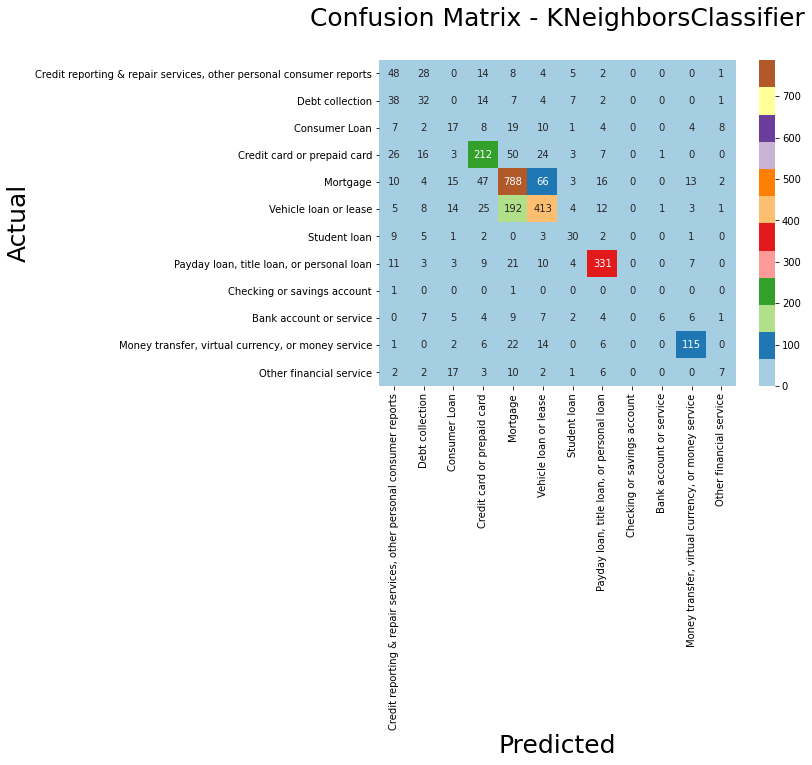

In [115]:
#Confusion Matrix of KNeighborsClassifier
conf_mat = confusion_matrix(y_test, knn_predict)
fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(conf_mat, annot = True, fmt = "d", cmap = "Paired", xticklabels = df['Product'].unique(), yticklabels = df['Product'].unique())
plt.ylabel('Actual', fontsize = 25) 
plt.xlabel('Predicted', fontsize = 25)
plt.title('Confusion Matrix - KNeighborsClassifier\n', fontsize = 25)
plt.show()

In [116]:
Models_Accuracy = Models_Accuracy.append(dict(zip(columns, ["KNeighbors Classifier", 
                                                            100 * accuracy_score(y_train , knn_model.predict(X_train_tfidf)), 
                                                            100 * precision_score(y_train, knn_model.predict(X_train_tfidf), average = 'macro'), 
                                                            100 * recall_score(y_train, knn_model.predict(X_train_tfidf), average = 'micro'), 
                                                            100 * f1_score(y_train, knn_model.predict(X_train_tfidf), average = 'weighted'), 
                                                            100 * accuracy_score(y_test , knn_model.predict(X_test_tfidf)), 
                                                            100 * precision_score(y_test , knn_model.predict(X_test_tfidf), average = 'macro'),
                                                            100 * recall_score(y_test , knn_model.predict(X_test_tfidf), average = 'macro'),
                                                            100 * f1_score(y_test , knn_model.predict(X_test_tfidf), average = 'macro')])), ignore_index = True)

In [117]:
Models_Accuracy

,Model Name,Train_Accuracy,Train_Precision,Train_Recall,Train_F1-Score,Test_Accuracy,Test_Precision,Test_Recall,Test_F1-Score
0,Logistic Regression,93.758333,87.087711,93.758333,93.703086,76.400000,62.620358,55.600563,58.140555
1,Linear SVC,85.241667,79.401227,85.241667,84.695331,76.533333,63.580212,50.894392,53.631694
2,Multinomial NB,73.558333,69.719660,73.558333,68.908968,69.566667,53.694419,32.888562,32.475852
3,Random Forest Classifier,65.833333,83.535026,65.833333,62.679642,59.133333,36.786941,26.051192,27.148975
4,Decision Tree Classifier,99.983333,99.991759,99.983333,99.983322,64.233333,43.180829,42.517139,42.732847
5,KNeighbors Classifier,80.016667,68.697748,80.016667,79.590633,66.633333,50.667733,44.550919,45.132373


### Accuracy Summary of various Machine Learning Models

In [118]:
from collections import defaultdict
acc_dict = defaultdict(float)
#Random Forest Classifier
print("Random Forest Classifier : Accuracy =", round(rfc_accuracy * 100, 2), "%")
acc_dict["Random Forest Classifier"] = round(rfc_accuracy * 100, 2)
#Linear Support Vector Machine
print("Linear Support Vector Machine : Accuracy =", round(svc_accuracy * 100, 2), "%")
acc_dict["Linear Support Vector Machine"] = round(svc_accuracy * 100, 2)
#Multinomial Naive Bayes
print("Multinomial Naive Bayes : Accuracy =", round(nb_accuracy * 100, 2), "%")
acc_dict["Multinomial Naive Bayes"] = round(nb_accuracy * 100, 2)
#Logistic Regression
print("Logistic Regression : Accuracy =", round(lr_accuracy * 100, 2), "%")
acc_dict["Logistic Regression"] = round(lr_accuracy * 100, 2)
#K Nearest Neighbors Classifier
print("K Nearest Neighbors Classifier : Accuracy =", round(knn_accuracy * 100, 2), "%")
acc_dict["K Nearest Neighbors Classifier"] = round(knn_accuracy * 100, 2)
#Decision Tree Classifier
print("Decision Tree Classifier : Accuracy =", round(dtc_accuracy * 100, 2), "%")
acc_dict["Decision Tree Classifier"] = round(dtc_accuracy * 100, 2)

Random Forest Classifier : Accuracy = 59.13 %
Linear Support Vector Machine : Accuracy = 76.53 %
Multinomial Naive Bayes : Accuracy = 69.57 %
Logistic Regression : Accuracy = 76.4 %
K Nearest Neighbors Classifier : Accuracy = 66.63 %
Decision Tree Classifier : Accuracy = 64.23 %


In [119]:
Models_Accuracy

,Model Name,Train_Accuracy,Train_Precision,Train_Recall,Train_F1-Score,Test_Accuracy,Test_Precision,Test_Recall,Test_F1-Score
0,Logistic Regression,93.758333,87.087711,93.758333,93.703086,76.400000,62.620358,55.600563,58.140555
1,Linear SVC,85.241667,79.401227,85.241667,84.695331,76.533333,63.580212,50.894392,53.631694
2,Multinomial NB,73.558333,69.719660,73.558333,68.908968,69.566667,53.694419,32.888562,32.475852
3,Random Forest Classifier,65.833333,83.535026,65.833333,62.679642,59.133333,36.786941,26.051192,27.148975
4,Decision Tree Classifier,99.983333,99.991759,99.983333,99.983322,64.233333,43.180829,42.517139,42.732847
5,KNeighbors Classifier,80.016667,68.697748,80.016667,79.590633,66.633333,50.667733,44.550919,45.132373


From the above DataFrame we can easily conclude that best 3 Machine Learning Models are (on the basis of Test Accuracy) :
 - Linear SVC with Accuracy __76.53%__
 - Logistic Regression with Accuracy __76.4%__
 - Multinomial NB with Accuracy __69.57%__

### Top 5 Correlated Terms with each Product Category

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf = TfidfVectorizer(encoding = 'utf-8', lowercase = True, stop_words = 'english', 
                        ngram_range = (1, 2), min_df = 5)
shape = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray().shape
print("Each complaint in the data frame is having %d features." %(shape[1]))
print("(TFIDF score of unigrams and bigrams)")

Each complaint in the data frame is having 37074 features.
(TFIDF score of unigrams and bigrams)


 - Let's find the top five correlated terms with each of the product category present in the data frame

In [121]:
from sklearn.feature_selection import chi2
N = 5
f = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
c = df.Category_id
for Product, Category_id in sorted(dict(df[['Product', 'Category_id']].drop_duplicates().values).items()):
    ind = np.argsort(chi2(f, c == Category_id)[0])
    f_names = np.array(tfidf.get_feature_names())[ind]
    unigrams = [i for i in f_names if len(i.split(' ')) == 1]
    bigrams = [i for i in f_names if len(i.split(' ')) == 2]
    print(" * ", Product)
    print("    - Unigrams : " + ', '.join(unigrams[::-1][:N]))
    print("    - Bigrams : " + ', '.join(bigrams[::-1][:N]))
    print("\n")

 *  Bank account or service
    - Unigrams : bank, scottrade, overdraft, branch, deposit
    - Bigrams : checking account, debit card, overdraft fee, scottrade bank, citigold checking


 *  Checking or savings account
    - Unigrams : overdraft, deposit, branch, bank, bonus
    - Bigrams : overdraft fee, checking account, saving account, debit card, direct deposit


 *  Consumer Loan
    - Unigrams : car, vehicle, ally, ford, dealership
    - Bigrams : auto loan, regional acceptance, car loan, ally financial, lien release


 *  Credit card or prepaid card
    - Unigrams : card, amex, express, citi, reward
    - Bigrams : credit card, america express, balance transfer, annual fee, late fee


 *  Credit reporting & repair services, other personal consumer reports
    - Unigrams : equifax, inquiry, report, experian, transition
    - Bigrams : credit report, credit bureau, hard inquiry, credit file, credit reporting


 *  Debt collection
    - Unigrams : debt, collection, collect, collecto

## Summary

**Q1. What are the most common unigrams and bigrams to each Product Category ?**

Following are the top 5 most common words from each Product category :<br>
(Refer above for both **Code** and **Explaination**, used to get the following answer)

 *  Bank account or service
    - Unigrams : bank, scottrade, overdraft, branch, deposit
    - Bigrams : checking account, debit card, overdraft fee, scottrade bank, citigold checking


 *  Checking or savings account
    - Unigrams : overdraft, deposit, branch, bank, bonus
    - Bigrams : overdraft fee, checking account, saving account, debit card, direct deposit


 *  Consumer Loan
    - Unigrams : car, vehicle, ally, ford, dealership
    - Bigrams : auto loan, regional acceptance, car loan, ally financial, lien release


 *  Credit card or prepaid card
    - Unigrams : card, amex, express, citi, reward
    - Bigrams : credit card, america express, balance transfer, annual fee, late fee


 *  Credit reporting & repair services, other personal consumer reports
    - Unigrams : equifax, inquiry, report, experian, transition
    - Bigrams : credit report, credit bureau, hard inquiry, credit file, credit reporting


 *  Debt collection
    - Unigrams : debt, collection, collect, collector, recovery
    - Bigrams : collection agency, collect debt, debt collector, debt collection, portfolio recovery


 *  Money transfer, virtual currency, or money service
    - Unigrams : coinbase, pal, moneygram, wu, bitcoin
    - Bigrams : western union, coinbase account, money transfer, account coinbase, money gram


 *  Mortgage
    - Unigrams : mortgage, modification, escrow, ocwen, foreclosure
    - Bigrams : loan modification, mortgage payment, mortgage company, escrow account, short sale


 *  Other financial service
    - Unigrams : vast, productive, face, 5900, deliquency
    - Bigrams : check payable, 34 month, month service, verified time, inspection report


 *  Payday loan, title loan, or personal loan
    - Unigrams : payday, ace, loan, cashnet, borrowed
    - Bigrams : payday loan, ace cash, cash express, applied payday, loan illegal


 *  Student loan
    - Unigrams : navient, student, loan, school, repayment
    - Bigrams : student loan, private loan, income based, loan forgiveness, loan navient


 *  Vehicle loan or lease
    - Unigrams : vehicle, car, honda, santander, lease
    - Bigrams : bow financial, honda financial, santander consumer, gap insurance, used vehicle

__Q2. Which Machine Learning Algorithm suits best for this problem ?__

The following is the DataFrame showing the accuracy of various Machine Learning Algorithms implemented above:<br>
(Refer above for both **Code** and **Explaination**, used to get the following answer)

In [122]:
Models_Accuracy

,Model Name,Train_Accuracy,Train_Precision,Train_Recall,Train_F1-Score,Test_Accuracy,Test_Precision,Test_Recall,Test_F1-Score
0,Logistic Regression,93.758333,87.087711,93.758333,93.703086,76.400000,62.620358,55.600563,58.140555
1,Linear SVC,85.241667,79.401227,85.241667,84.695331,76.533333,63.580212,50.894392,53.631694
2,Multinomial NB,73.558333,69.719660,73.558333,68.908968,69.566667,53.694419,32.888562,32.475852
3,Random Forest Classifier,65.833333,83.535026,65.833333,62.679642,59.133333,36.786941,26.051192,27.148975
4,Decision Tree Classifier,99.983333,99.991759,99.983333,99.983322,64.233333,43.180829,42.517139,42.732847
5,KNeighbors Classifier,80.016667,68.697748,80.016667,79.590633,66.633333,50.667733,44.550919,45.132373


Best suited Algorithm for this problem is : **Linear SVC** (Based on Test Accuracy) <br>
Best suited Algorithm for this problem is : **Decision Tree** (Based on Train Accuracy)

**Q3. Which Product Category has maximum number of Consumer Complaints ?**

Following is the list showing the various Product Categories along with Number of Consumer Complaints:<br>
(Refer above for both **Code** and **Explaination** along with **Plot**, used to get the following answer)

In [123]:
for i, j in dict(df.groupby('Product').Consumer_complaint_narrative.count().sort_values(ascending=False)).items():
    print(" * ", i, '-->', j)

 *  Credit reporting & repair services, other personal consumer reports --> 4817
 *  Debt collection --> 3389
 *  Mortgage --> 1996
 *  Credit card or prepaid card --> 1712
 *  Student loan --> 830
 *  Bank account or service --> 548
 *  Checking or savings account --> 527
 *  Consumer Loan --> 402
 *  Money transfer, virtual currency, or money service --> 266
 *  Payday loan, title loan, or personal loan --> 253
 *  Vehicle loan or lease --> 250
 *  Other financial service --> 10


Product Category having maximum number of Consumer Complaints is : **Credit reporting & repair services, other personal consumer reports**

**Q4. Which Company has maximum number of Consumer Complaints ?**

Following is the list showing the top 10 Companies along with Number of Consumer Complaints:<br>
(Refer above for both **Code** and **Explaination** along with **Plot**, used to get the following answer)

In [124]:
companies.head(10)

Company
EQUIFAX, INC.                             1483
Experian Information Solutions Inc.       1225
TRANSUNION INTERMEDIATE HOLDINGS, INC.    1196
WELLS FARGO & COMPANY                      552
CITIBANK, N.A.                             546
BANK OF AMERICA, NATIONAL ASSOCIATION      521
JPMORGAN CHASE & CO.                       514
Navient Solutions, LLC.                    486
CAPITAL ONE FINANCIAL CORPORATION          398
SYNCHRONY FINANCIAL                        257
Name: Company, dtype: int64

Company having maximum number of Consumer Complaints is : **EQUIFAX, INC.**

**Q5. What is the response of the companies to maximum number of Consumer Complaints ?**

Following is the list showing the Company's Response to Complaints along with Number of Consumer Complaints with that Response:<br>
(Refer above for both **Code** and **Explaination** along with **Plot**, used to get the following answer)

In [125]:
df['Company_response_to_consumer'].value_counts()

Closed with explanation            12081
Closed with non-monetary relief     1785
Closed with monetary relief          880
Closed                               167
Untimely response                     87
Name: Company_response_to_consumer, dtype: int64

Company's Response to maximum number of Consumer Complaints is : **Closed with explanation** without any monetory and non-monetary relief.

**Q6. Which State has maximum number of Complainants ?**

Following is the list showing the State along with Number of Complainants belonging to that State:<br>
(Refer above for both **Code** and **Explaination** along with **Plot**, used to get the following answer)

In [126]:
gp_state = df.groupby('State')
state_count = gp_state.State.count().sort_values(ascending = False)

In [127]:
state_count.head(10)

State
CA    2025
FL    1493
TX    1454
GA     896
NY     836
IL     564
NJ     522
PA     515
OH     484
NC     463
Name: State, dtype: int64

State with Maximum Number of Complainants is : **CA (California)**

**Q7. Which Year has maximum number of Consumer Complaints ?**

Following is the list showing the Year along with Number of Consumer Complaints in that year:<br>
(Refer above for both **Code** and **Explaination** along with **Plot**, used to get the following answer)

In [128]:
df.groupby('year').year.count().sort_values(ascending = False)

year
2018    4592
2017    4496
2016    3097
2015    2137
2019     678
Name: year, dtype: int64

Year having maximum number of Consumer Complaints is : **2018**

**Q8. Which Year has maximum number of Consumer Complaints ?**

Following is the list showing the Month along with Number of Consumer Complaints in that month:<br>
(Refer above for both **Code** and **Explaination** along with **Plot**, used to get the following answer)

In [129]:
df.groupby('month').month.count().sort_values(ascending = False)

month
09    1401
01    1390
10    1359
08    1343
07    1259
06    1259
05    1204
03    1185
12    1180
04    1166
02    1142
11    1112
Name: month, dtype: int64

Month having maximum number of Consumer Complaints is : **September (09)**